In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

In [2]:
def load_data(directory, maxData=None, randomState=1):
    '''
    Loads the different data sets from file. Smaller (random) subsets can be taken for experimenting by using the MaxData and 
    random state parameters
    '''
    #Get list of all images in directory
    imagePaths = glob.glob(directory+'/*/*.jpg', recursive=True)
    
    if maxData is not None:
        np.random.set_state=randomState
        imagePaths = np.random.choice(imagePaths,size=maxData)
          
    X =[]
    y =[]
    for path in imagePaths:
        label = path.split("\\")[-2]
        image = cv2.imread(path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        X.append(image)
        y.append(label)
        
    return np.array(X), np.array(y)

In [3]:
# Load data sources

X,y = load_data('./data/fruits/fruits-360/Training',maxData=10000)
X_flickr, y_flickr = load_data('./data/flickr')

X_flickr, y_flickr = shuffle(X_flickr, y_flickr)

fruitsubset = ['Strawberry', 'Apple', 'Lemon', 'Orange', 'Mango', 'Banana', 'Grape', 'Passion Fruit', 'Peach']
infruitsubset = np.in1d(y_flickr, fruitsubset)
X_flickr_subset = X_flickr[infruitsubset]
y_flickr_subset = y_flickr[infruitsubset]

# General statistics

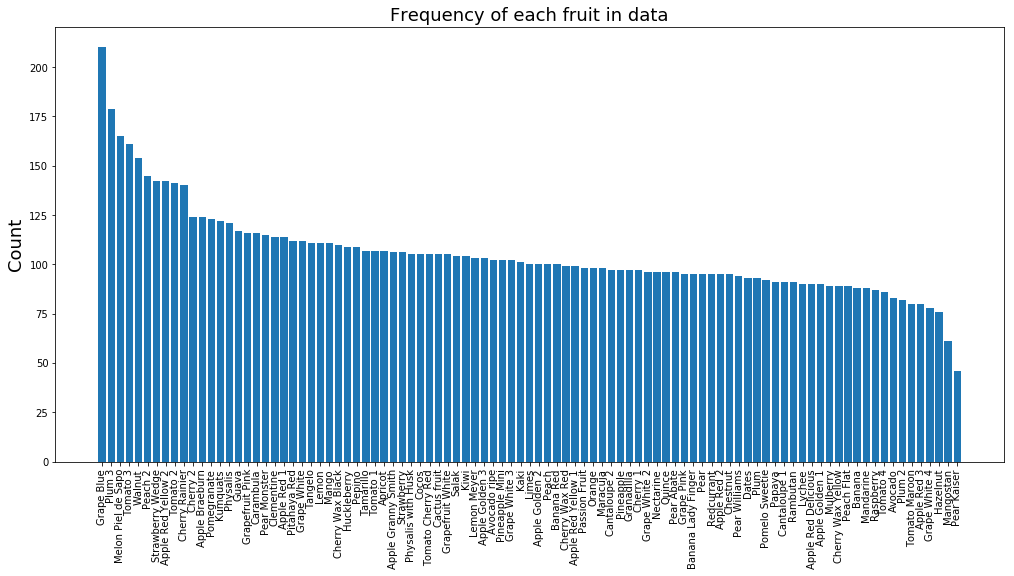

In [4]:
from collections import Counter

count = Counter(y)
df = pd.DataFrame([count.keys(), count.values()], index=['Fruit', 'Count'])
df = df.transpose()
df = df.sort_values('Count', ascending=False)

plt.figure(figsize=(17,8))
plt.bar(df.Fruit, df.Count)
plt.xticks(rotation=90);
plt.title("Frequency of each fruit in data", size=18);
plt.ylabel('Count', size=18);

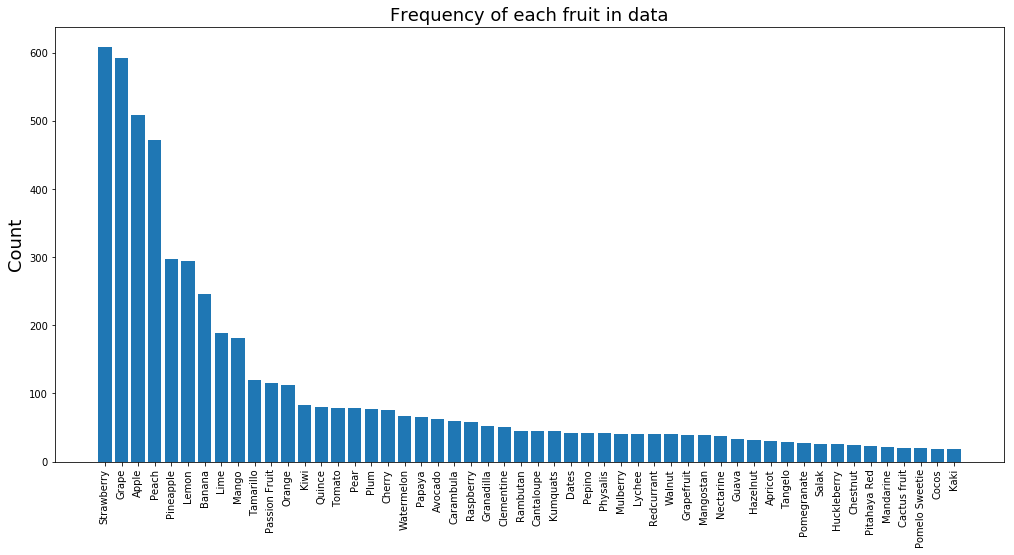

In [5]:
count = Counter(y_flickr)
df = pd.DataFrame([count.keys(), count.values()], index=['Fruit', 'Count'])
df = df.transpose()
df = df.sort_values('Count', ascending=False)

plt.figure(figsize=(17,8))
plt.bar(df.Fruit, df.Count)
plt.xticks(rotation=90);
plt.title("Frequency of each fruit in data", size=18);
plt.ylabel('Count', size=18);

## Visualising the data

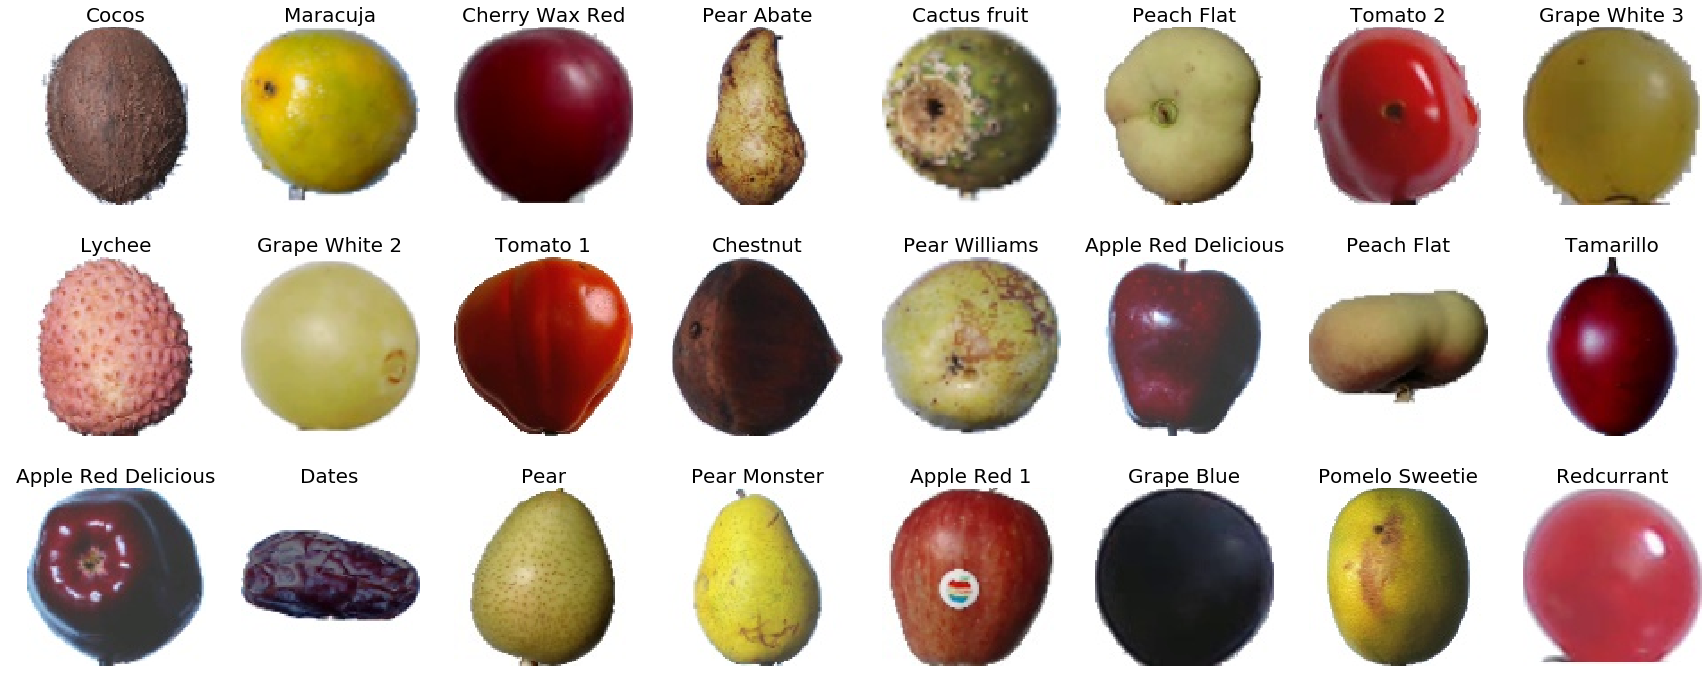

In [6]:
plt.figure(figsize=(30,12))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X[i,:,:,:])
    plt.title(y[i], size = 20)
    plt.axis('off')
    
plt.savefig('fruit360_samples.png')

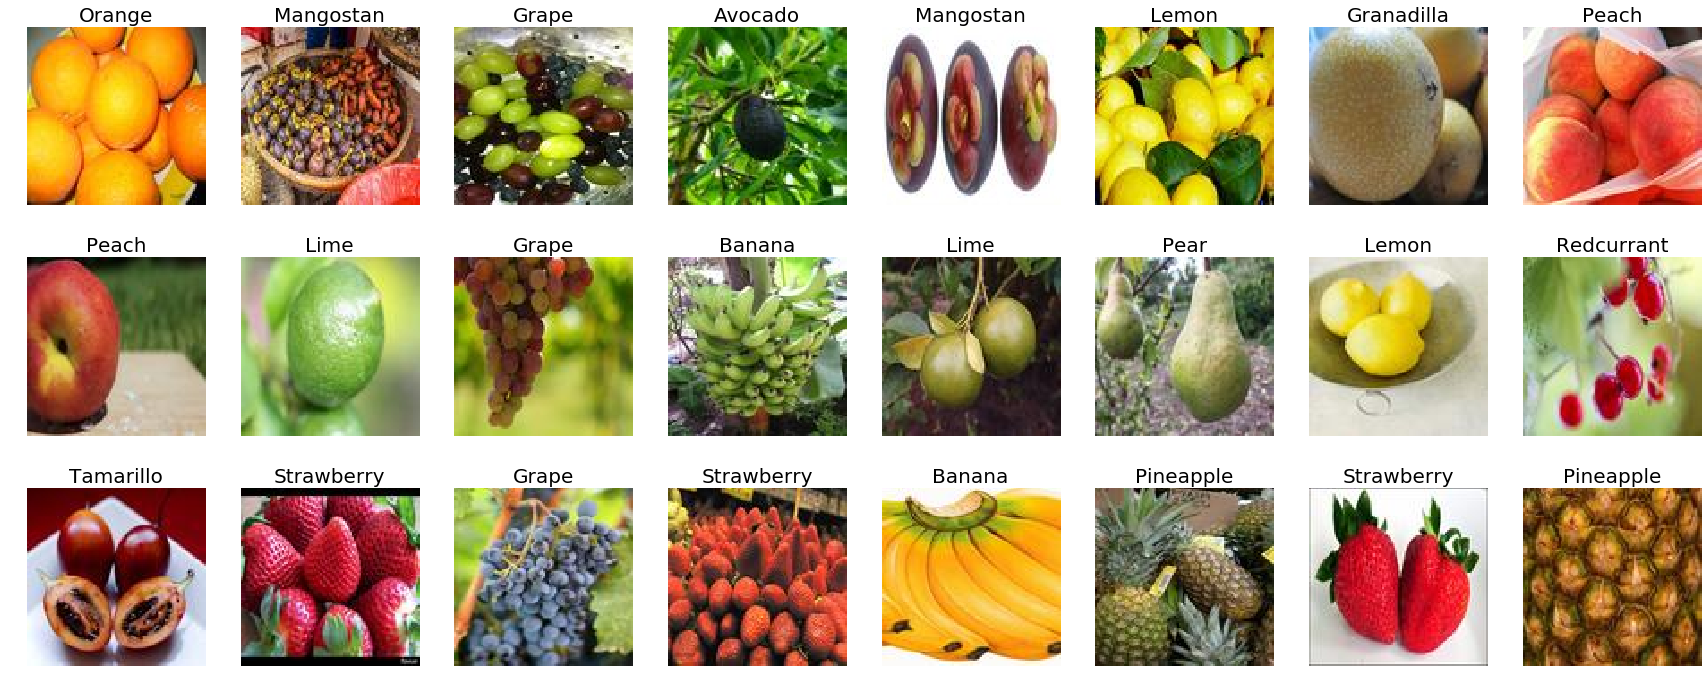

In [7]:
plt.figure(figsize=(30,12))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X_flickr[i,:,:,:])
    plt.title(y_flickr[i], size = 20)
    plt.axis('off')
plt.savefig('flickr_samples.png')

# PCA analysis:

## Fruit 360 dataset

In [8]:
X_flat = X.reshape(len(X),-1)
pca = PCA(n_components=25)
pca_fruit360 = pca.fit_transform(X_flat)

The first 25 Principal Components extracted from the fruit 360 data set are shown below. The pixels at the edges are not used, whilst the principal components appear to distinguish more on colour and colour gradient than on any structure

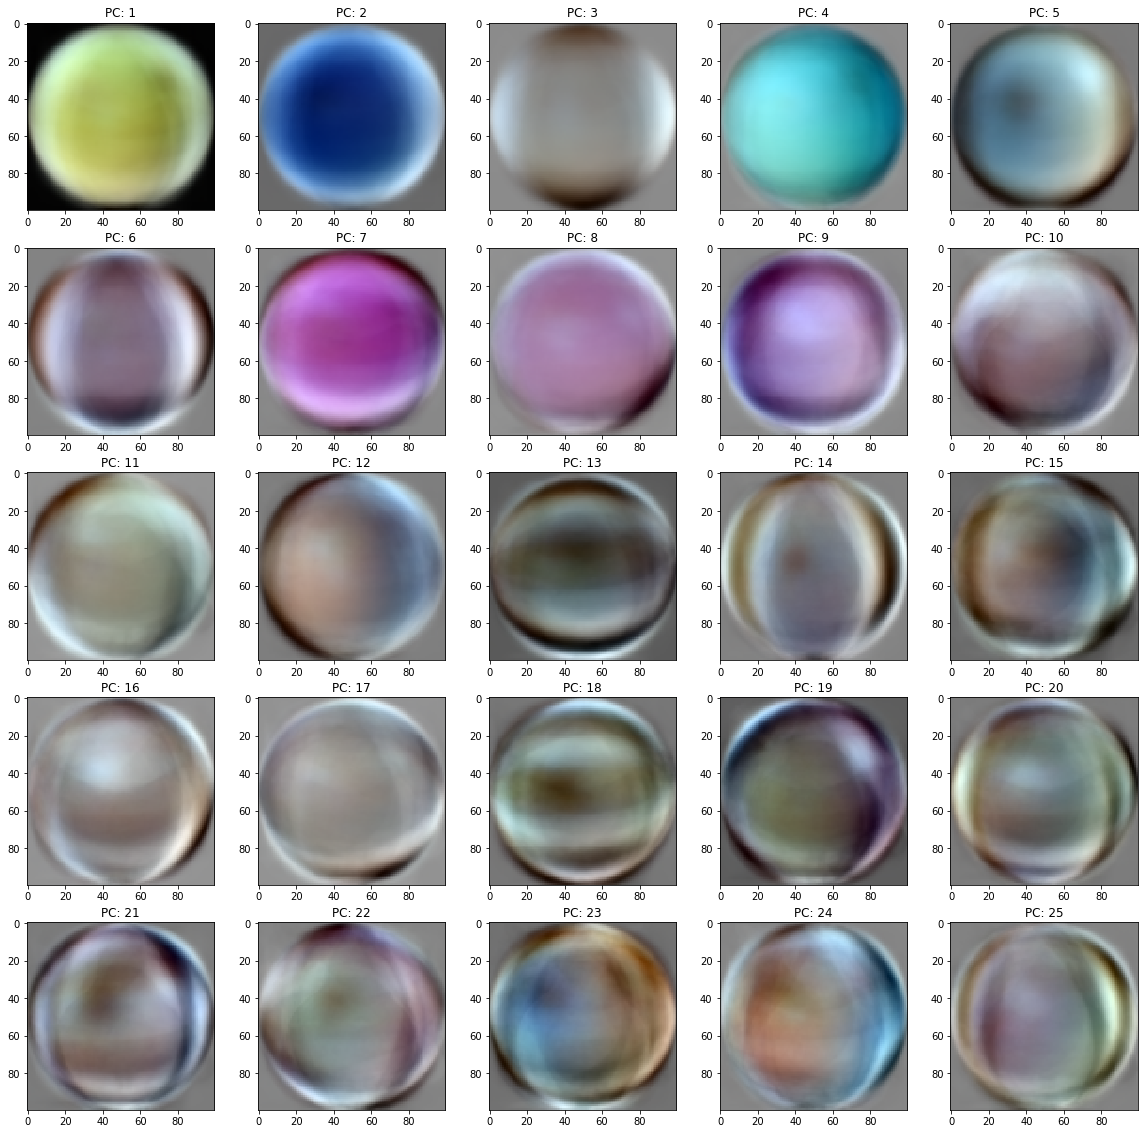

In [9]:
plt.figure(figsize=(20,20))

for count, component in enumerate(pca.components_[:25]):
    plt.subplot(5,5,count+1)
    mincomp = np.min(component)
    maxcomp = np.max(component)
    
    image = (255*(component-mincomp)/(maxcomp-mincomp)).astype(int)
    image = image.reshape((100,100,3))
    
    plt.imshow(image)
    plt.title('PC: '+str(count+1))

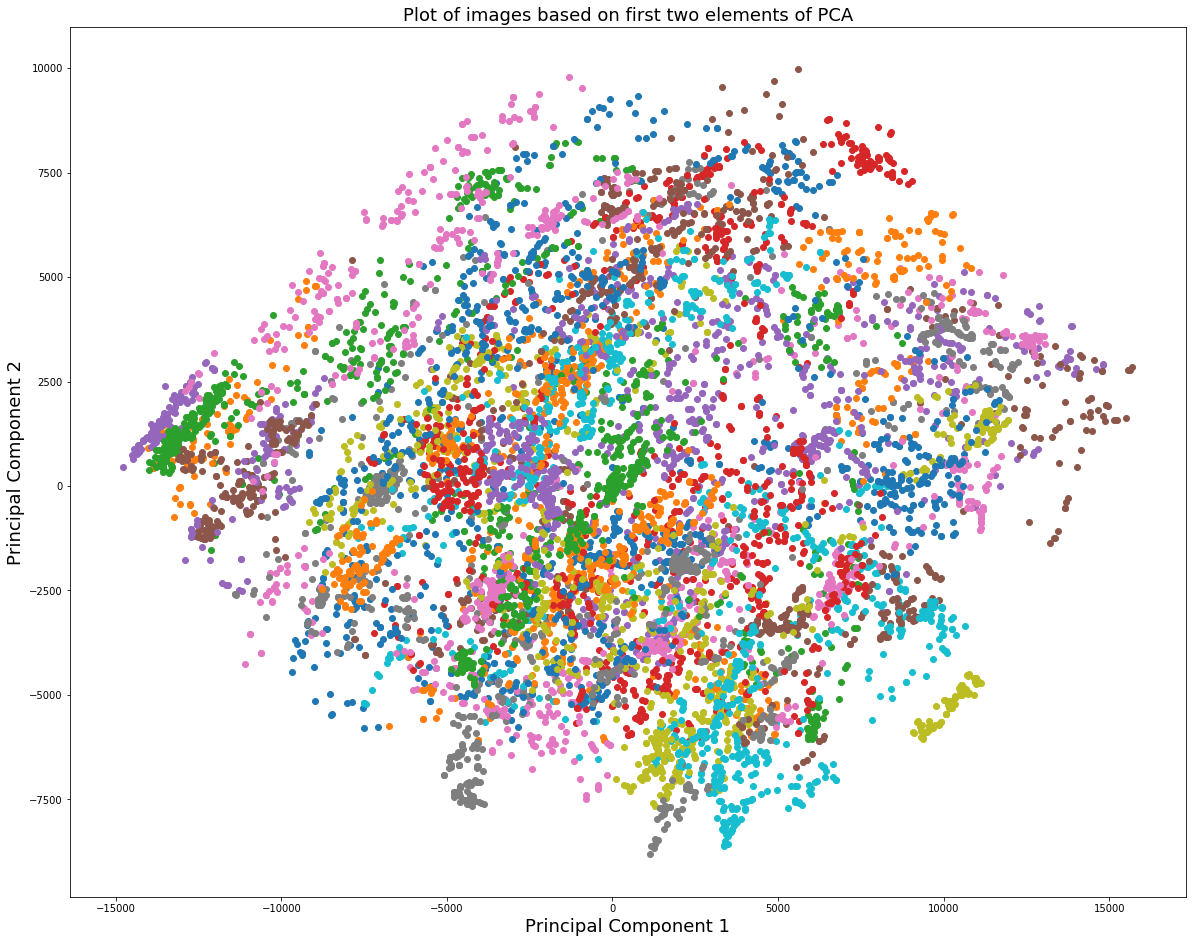

In [10]:
plt.figure(figsize=(20,16))
for fruit in np.unique(y):
    mask = (y==fruit)
    pca_fruit = pca_fruit360[mask]
    plt.scatter(pca_fruit[:,0], pca_fruit[:,1], label=fruit)

plt.xlabel('Principal Component 1', size=18);
plt.ylabel('Principal Component 2', size=18);
plt.title('Plot of images based on first two elements of PCA', size=18);

The following code completes PCA of the fruit 360 dataset by fruit type. The first two PCs are then grouped on the chart. The idea is to determine whether the way the data was captured has led to distinct clusters in the datasets. The results for the first 15 fruit are included below and show extremely high variation 

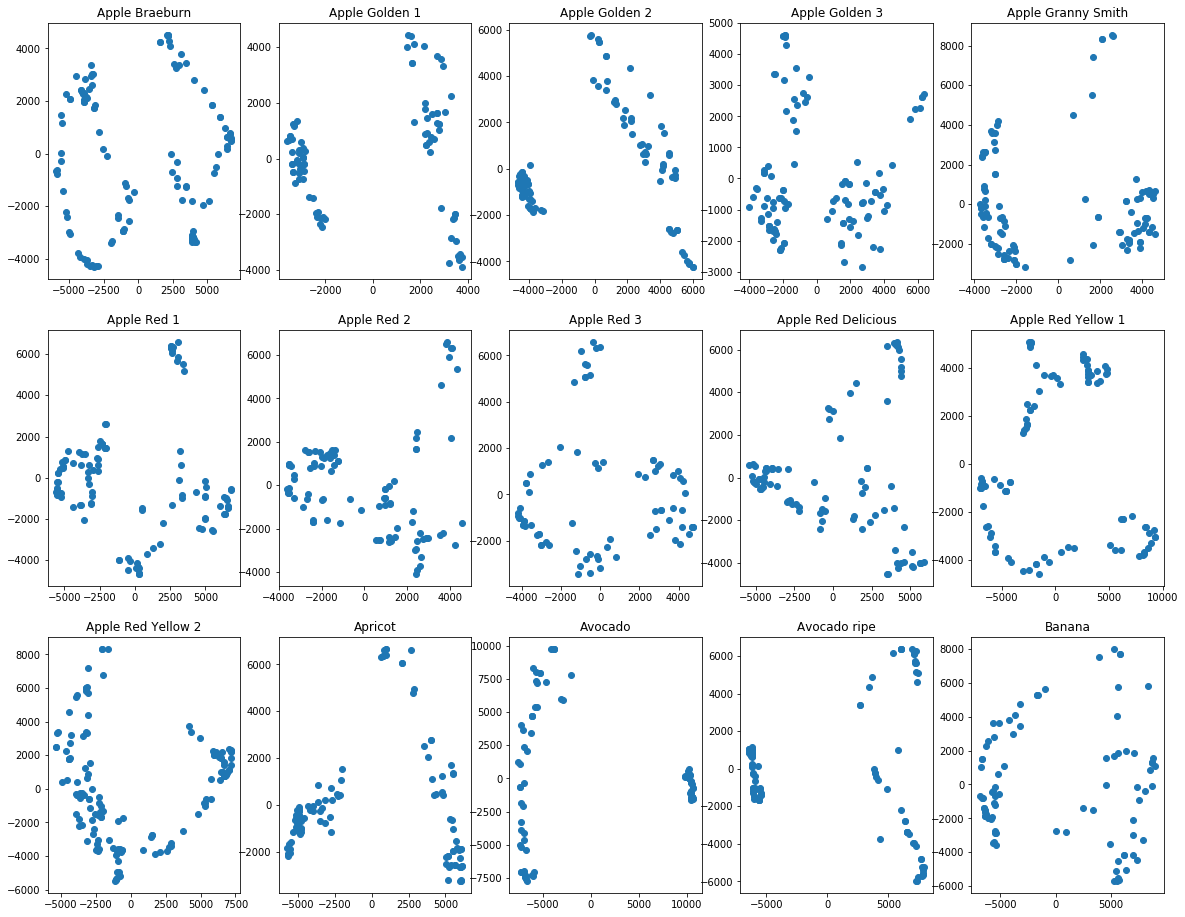

In [11]:
plt.figure(figsize=(20,16))

results = []
for count, fruit in enumerate(np.unique(y)[:15]):
    mask = (y==fruit)
    X_fruit = X_flat[mask]
    pca = PCA(n_components=2)
    pca_fruit = pca.fit_transform(X_fruit)
    plt.subplot(3,5, count+1)
    plt.scatter(pca_fruit[:,0], pca_fruit[:,1])
    plt.title(fruit)

In [12]:
X_flickr_flat = X_flickr.reshape(len(X_flickr), -1)

pca = PCA(n_components=25)
pca_flickr = pca.fit_transform(X_flickr_flat)

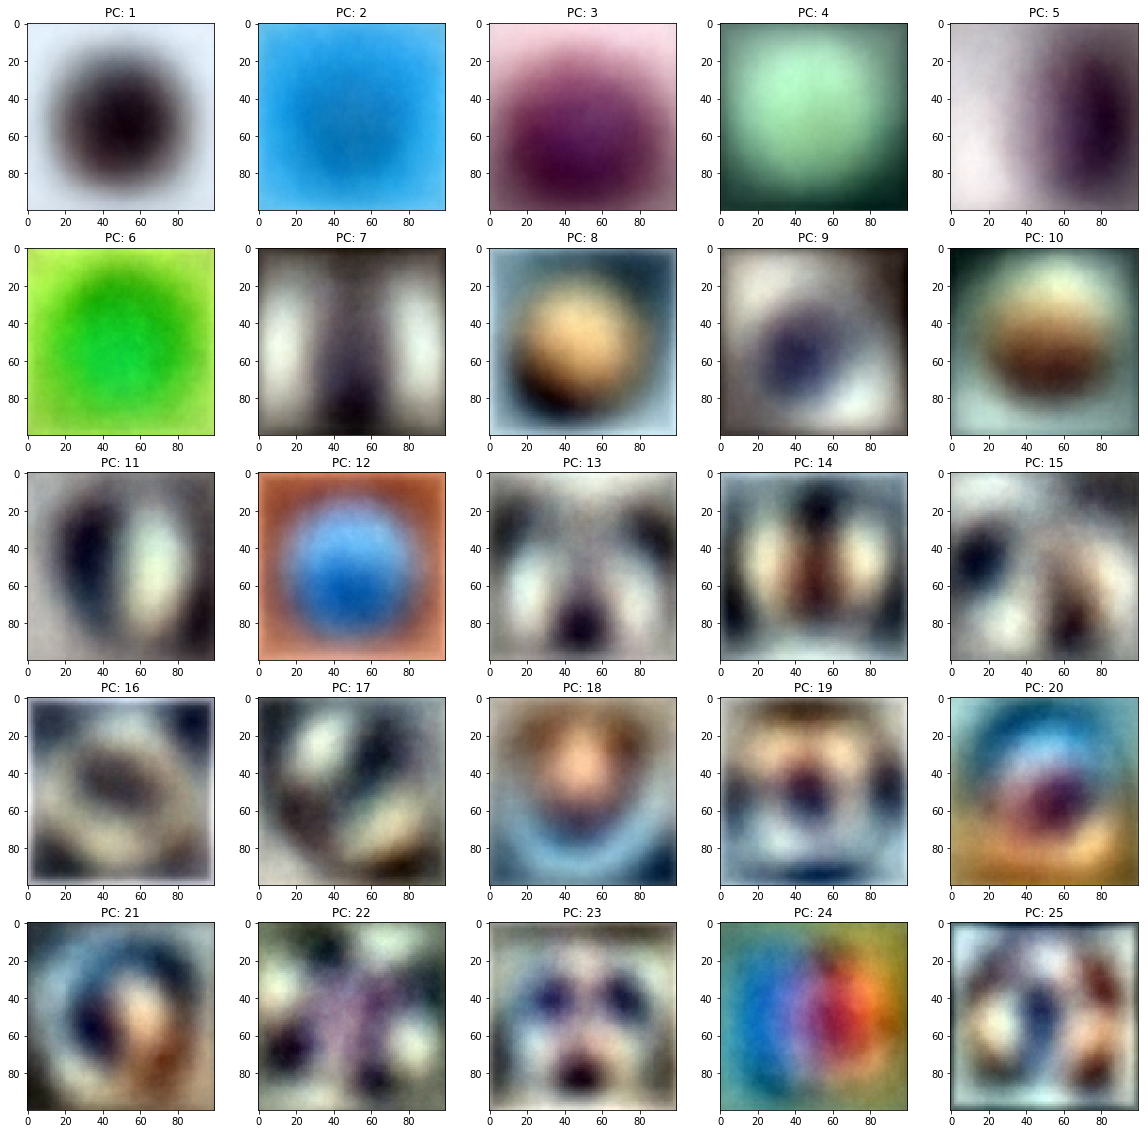

In [13]:
plt.figure(figsize=(20,20))

for count, component in enumerate(pca.components_[:25]):
    plt.subplot(5,5,count+1)
    mincomp = np.min(component)
    maxcomp = np.max(component)
    
    image = (255*(component-mincomp)/(maxcomp-mincomp)).astype(int)
    image = image.reshape((100,100,3))
    
    plt.imshow(image)
    plt.title('PC: '+str(count+1))

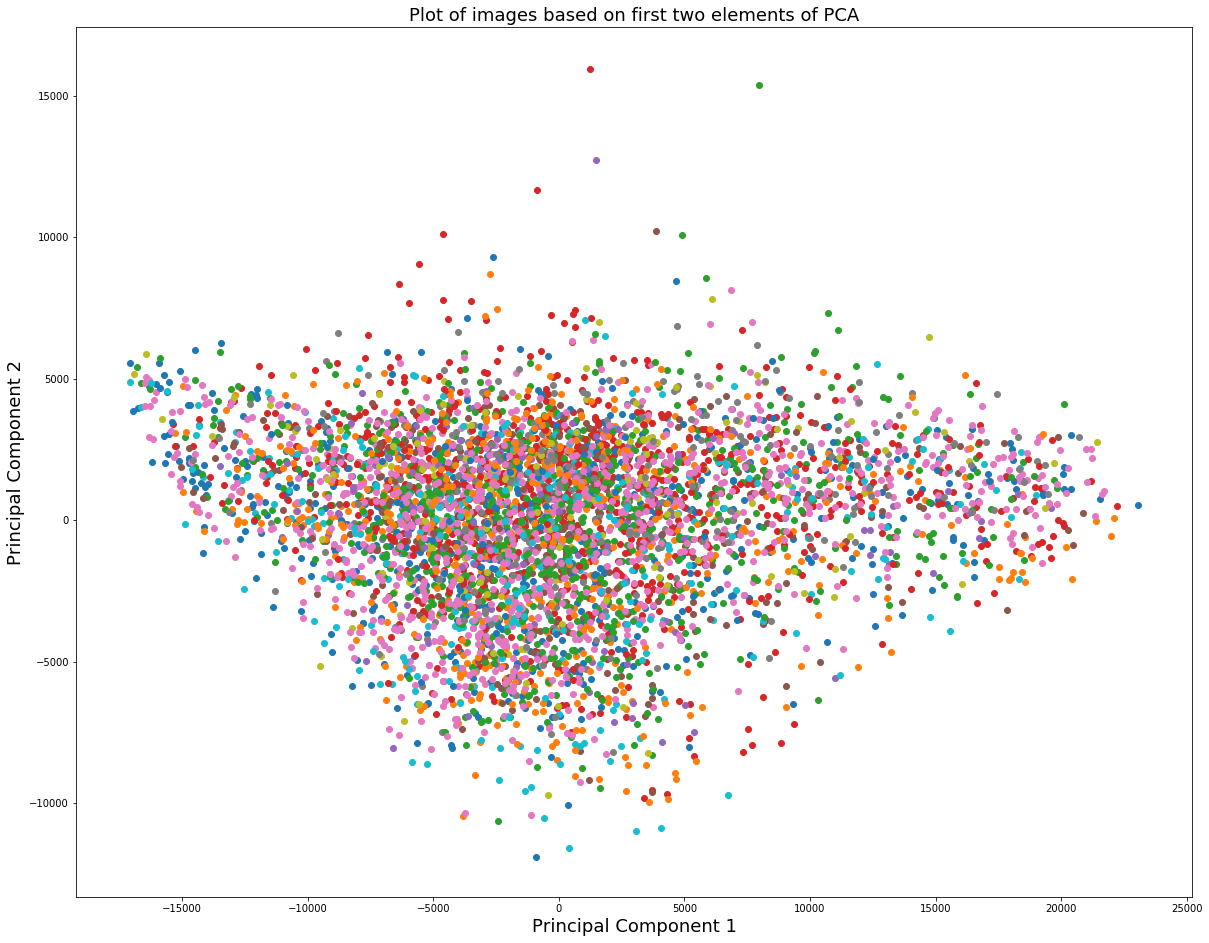

In [14]:
plt.figure(figsize=(20,16))
for fruit in np.unique(y_flickr):
    mask = (y_flickr==fruit)
    pca_fruit = pca_flickr[mask]
    plt.scatter(pca_fruit[:,0], pca_fruit[:,1], label=fruit);

plt.xlabel('Principal Component 1', size=18);
plt.ylabel('Principal Component 2', size=18);
plt.title('Plot of images based on first two elements of PCA', size=18);

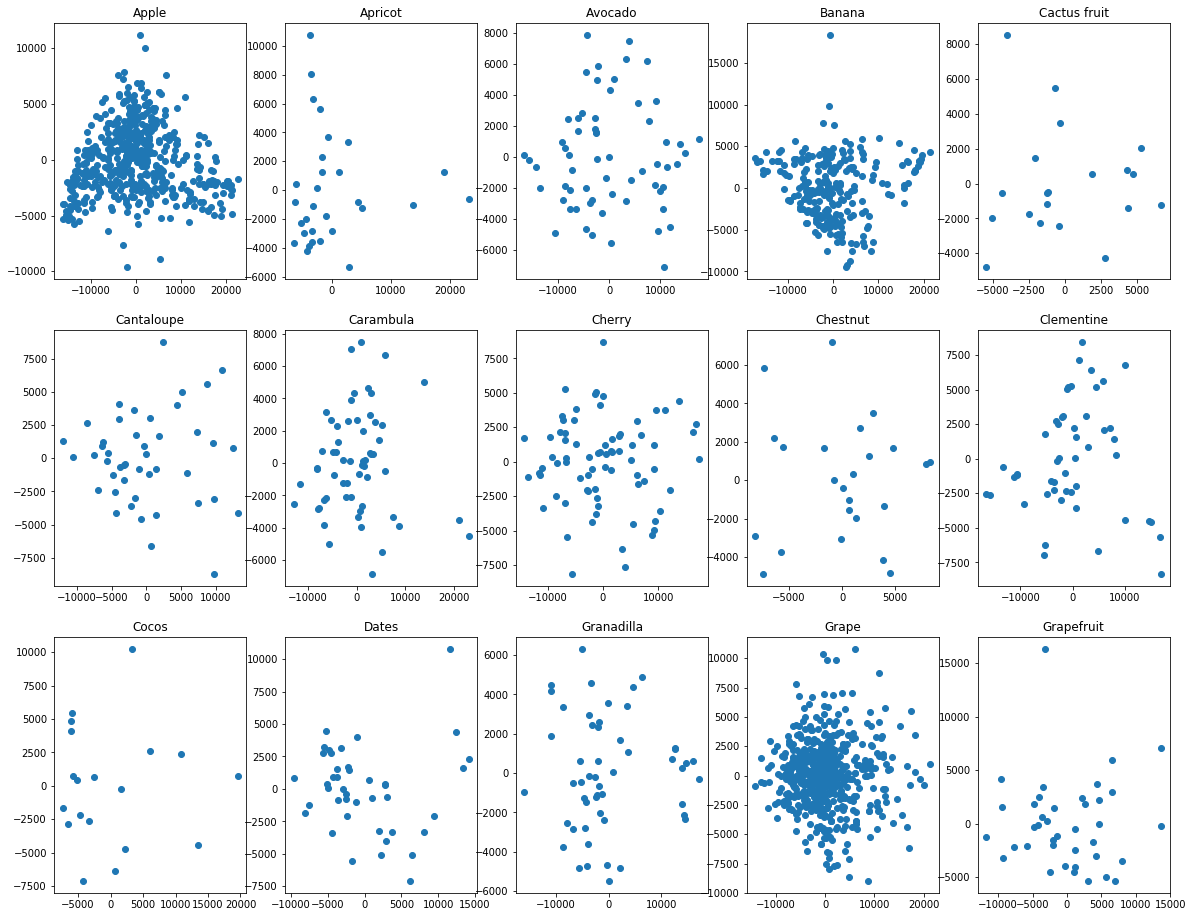

In [15]:
plt.figure(figsize=(20,16))

results = []
for count, fruit in enumerate(np.unique(y_flickr)[:15]):
    mask = (y_flickr==fruit)
    X_fruit = X_flickr_flat[mask]
    pca = PCA(n_components=2)
    pca_fruit = pca.fit_transform(X_fruit)
    plt.subplot(3,5, count+1)
    plt.scatter(pca_fruit[:,0], pca_fruit[:,1])
    plt.title(fruit)